***[RQ4] What is the most common way of payments? Discover the way payments are executed in each borough and visualize the number of payments for any possible means. Then run the Chi-squared test to see whether the method of payment is correlated to the borough. Then, comment the results.***

**Month of JANUARY:** 

We imported only the columns useful to answer our Rquestion.
NB:Payment_type is represented by a numeric code signifying how the passenger paid for the trip.
1= Credit card; 2= Cash; 3= No charge; 4= Dispute; 5= Unknown; 6= Voided trip

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
data=pd.read_csv('/Users/Enzopc/Desktop/yellow_tripdata_2018-01.csv', usecols=['PULocationID', 'DOLocationID','payment_type','total_amount'])
zone=pd.read_csv('/Users/Enzopc/Desktop/taxi _zone_lookup.csv', usecols=['LocationID', 'Borough'])
datazone=pd.merge(data, zone, how='left', left_on=['PULocationID'],right_on=['LocationID'])

print("Number of rows:", datazone.shape[0])
print("Number of columns: ", datazone.shape[1])
datazone.head()

Number of rows: 8759874
Number of columns:  6


,PULocationID,DOLocationID,payment_type,total_amount,LocationID,Borough
0,41,24,2,5.80,41,Manhattan
1,239,140,2,15.30,239,Manhattan
2,262,141,1,8.30,262,Manhattan
3,140,257,2,34.80,140,Manhattan
4,246,239,1,16.55,246,Manhattan


In [3]:
Tmax=datazone['total_amount'].max()
Tmin=datazone['total_amount'].min()
Tmean=datazone['total_amount'].mean()
Tmedian=datazone['total_amount'].median()
print(Tmax, Tmin, Tmean, Tmedian)

8016.8 -450.3 15.490981803121242 11.3


***Data Cleaning***

Total_amount: some values were negative. The cases were considered as being machine errors during the data entry. They were replaced by their absolute values. Furthermore, as the minimum Total_amount that is chargeable for any service is $2.5, every transaction falling below that amount was replaced by the median value of the Total_amount 11.3.

In [12]:
def Clean_data(data):
    data.total_amount = data.total_amount.abs()
    indices_oi = data[(data.total_amount<2.5)].index
    data.loc[indices_oi,'total_amount'] = 11.3

In [13]:
Clean_data(datazone)

In [14]:
datazone['total_amount'].min()

2.5

In [16]:
datazone['total_amount'].mean()

15.504583075243058

In [17]:
datazone['total_amount'].median()

11.3

In [26]:
# What is the most common way of payments? #
round((datazone['payment_type'].value_counts()/len(datazone))*100,2)

1    69.70
2    29.67
3     0.49
4     0.14
Name: payment_type, dtype: float64

As we can see from an initial count, it results that the most common way of payments is by credit card


1: 69.70%  2: 29.67%  3: 0.49%  4: 0.14%

In [27]:
#Discover the way payments are executed in each borough and visualize the number of payments for any possible means.

contingency_table = pd.crosstab(datazone['payment_type'], datazone['Borough'])
contingency_table

Borough,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island,Unknown
payment_type,,,,,,,
1,2939,63280,439,5564803,365207,69,109134
2,4114,35339,88,2356898,154704,65,47739
3,271,1320,33,34240,5697,9,1634
4,65,311,11,9762,1298,1,404


***Chi-squared test to see whether the method of payment is correlated to the borough.***


H0 (Null Hypothesis): There is no relationship between payment_type and borough.

H1 (Alternative Hypothesis): There is a relationship between payment_type and borough.



If the p-value is significant, you can reject the null hypothesis and claim that the findings support the alternative hypothesis.


In [28]:
stats.chi2_contingency(contingency_table)

(14463.192599649135,
 0.0,
 18,
 array([[5.15033445e+03, 6.98769831e+04, 3.98002567e+02, 5.55231216e+06,
         3.67267847e+05, 1.00371926e+02, 1.10765299e+05],
        [2.19222553e+03, 2.97429434e+04, 1.69408685e+02, 2.36332622e+06,
         1.56326537e+05, 4.27230309e+01, 4.71469415e+04],
        [3.64428023e+01, 4.94436450e+02, 2.81619165e+00, 3.92871213e+04,
         2.59871852e+03, 7.10212955e-01, 7.83754520e+02],
        [9.99722462e+00, 1.35636997e+02, 7.72555861e-01, 1.07774966e+04,
         7.12897230e+02, 1.94830200e-01, 2.15004596e+02]]))

The first value (14463.19) is the Chi-square value, followed by the p-value ~ 0, then comes the degrees of freedom (18), and lastly it outputs the expected frequencies as an array. Since all of the expected frequencies are greater than 5, the Chi-square test results can be trusted. 

We can reject the null hypothesis as the p-value is less than 0.05. Thus, the results indicate that there is a correlation/some sort of relationship between payment type and borough. For sure we do know that these two variables are not independent of each other.
We could relate this result to the "industrialization" of boroughs. Focusing on Manhattan, Brooklyn, EWR and Queens we can see that the most common way of payment is with credit card. Fos Staten Island there's no big difference and in Bronx most of the people pay with cash.

***Considerations:***

Replacing the yellow_tripdata_2018-01 with the datasets related to the other months and Repeating the analysis, we can say that the results are more or less the same and the interpretations given for January hold for the entire year.

***[RQ5] Does a long distance correlate with the duration of the trip on average? Make a plot that show the dependence between distance and duration of the trip. Then compute the Pearson Coefficient, is it significant? Comment the results you obtain.***

In [29]:
data=pd.read_csv('/Users/Enzopc/Desktop/yellow_tripdata_2018-01.csv', usecols=['tpep_pickup_datetime','tpep_dropoff_datetime','trip_distance','PULocationID', 'DOLocationID'])
zone=pd.read_csv('/Users/Enzopc/Desktop/taxi _zone_lookup.csv', usecols=['LocationID', 'Borough'])
datazone=pd.merge(data, zone, how='left', left_on=['PULocationID'],right_on=['LocationID'])
datazone=datazone[datazone.trip_distance != 0]

print("Number of rows:", datazone.shape[0])
print("Number of columns: ", datazone.shape[1])
datazone.head()

Number of rows: 8704498
Number of columns:  7


,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,LocationID,Borough
0,2018-01-01 00:21:05,2018-01-01 00:24:23,0.5,41,24,41,Manhattan
1,2018-01-01 00:44:55,2018-01-01 01:03:05,2.7,239,140,239,Manhattan
2,2018-01-01 00:08:26,2018-01-01 00:14:21,0.8,262,141,262,Manhattan
3,2018-01-01 00:20:22,2018-01-01 00:52:51,10.2,140,257,140,Manhattan
4,2018-01-01 00:09:18,2018-01-01 00:27:06,2.5,246,239,246,Manhattan


In [30]:
#transformation from string to datetime
datazone['tpep_pickup_datetime']=pd.to_datetime(datazone['tpep_pickup_datetime'], format= "%Y-%m-%d %H:%M:%S")
datazone['tpep_dropoff_datetime']=pd.to_datetime(datazone['tpep_dropoff_datetime'],format= "%Y-%m-%d %H:%M:%S")

In [31]:
#trip_time: difference between dropoff and pickup
trip_duration= datazone['tpep_dropoff_datetime'] - datazone['tpep_pickup_datetime']

In [32]:
#insert the new column
datazone.insert(loc=2, column='trip_duration', value= trip_duration)

In [33]:
datazone.loc[:,'minutes_trip_duration']= datazone['trip_duration'].dt.seconds/60
datazone['minutes_trip_duration']= round(datazone['minutes_trip_duration'].astype('float64'),2)

In [36]:
#Computing the correlations
from scipy.stats.stats import pearsonr

boroughs=['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island', 'EWR', 'Unknown']
correl=pd.DataFrame(columns=boroughs)
pearson_correlations=list()
significance=list()

for i in boroughs:
    boroughdata=datazone.loc[(datazone['Borough']== i)]
    sign=pearsonr(boroughdata['trip_distance'], boroughdata['minutes_trip_duration'])
    rho_pearson=boroughdata['minutes_trip_duration'].corr(boroughdata['trip_distance'], method= 'pearson')
    pearson_correlations.append(rho_pearson)
    significance.append((round(sign[1]),2))
    
correl.loc[2] = pearson_correlations
correl.loc[3] = significance
correl


,Manhattan,Brooklyn,Queens,Bronx,Staten Island,EWR,Unknown
2,0.122993,0.13787,0.00366761,0.162682,0.793583,0.500259,0.153384
3,"(0.0, 2)","(0.0, 2)","(0.0, 2)","(0.0, 2)","(0.0, 2)","(0.0, 2)","(0.0, 2)"


The Pearson coefficients tell us that there is a strong positive dependence between trip duration and the borough only in the case of Staten Island, a not so strong dependence is that related to EWR borough. In the all other cases there is no strong dependence since we are referring to quite trafficated boroughs. So the trip duration depends not only on the distance, but also on the traffic situation. As the significance is  ~ 0 (less than 0.05) the coefficient is highly significant.  
We can see it from the plots below (respectively: Manhattan, Brooklyn, Queens, Bronx, Staten Island, EWR).

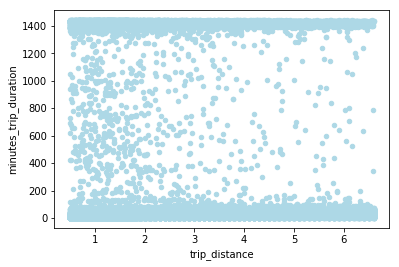

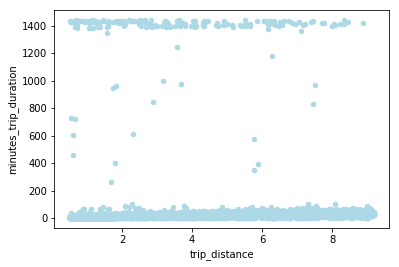

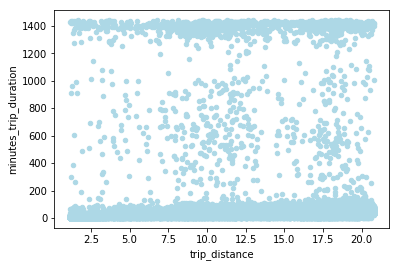

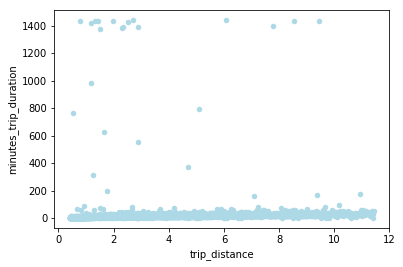

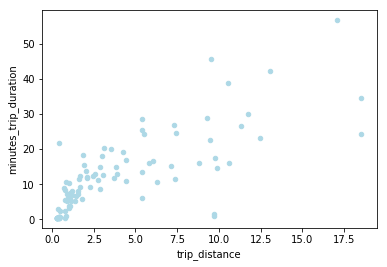

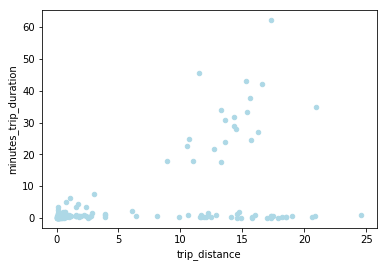

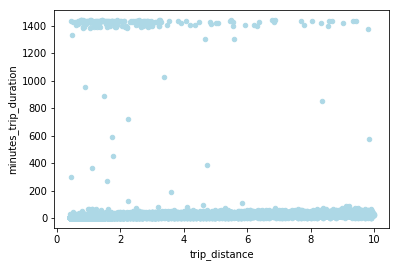

In [38]:
low= 0.05
high= 0.95
for i in boroughs:
    boroughdata=datazone.loc[(datazone['Borough']== i)]
    quantdata=boroughdata['trip_distance'].quantile([low, high])
    boroughdata_plot=boroughdata.loc[(boroughdata['trip_distance'] < quantdata[high]) & (boroughdata['trip_distance'] > quantdata[low])]
    boroughdata_plot.plot.scatter(x='trip_distance', y='minutes_trip_duration', c='LightBlue')